<a href="https://colab.research.google.com/github/pranshurastogi29/giat_profiling-for-cerebral-palsy/blob/master/classification_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import random
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import metrics
import numpy as np

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)
    
def dunn(k_list):
    
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di

In [0]:
df=pd.read_csv('/content/drive/My Drive/norm.csv')
df = df[['Stride Length (m)', 'Cadence(steps/min)', 'Leg Length (m)',
       'Age(years)','classs']]
X = df[['Stride Length (m)', 'Cadence(steps/min)', 'Leg Length (m)',
       'Age(years)']].values
y = df.classs.values

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [0]:
df = pd.concat([principalDf, df[['classs']]], axis = 1)

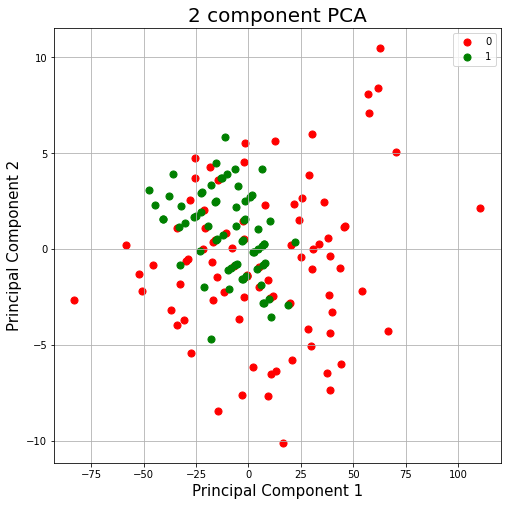

In [5]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['classs'] == target
    ax.scatter(df.loc[indicesToKeep, 'principal component 1']
               , df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [0]:
from sklearn.model_selection import train_test_split
poly = PolynomialFeatures(2)
X1 = poly.fit_transform(X)
x_tr,x_tt,y_tr,y_tt = train_test_split(X,y,test_size=.20,random_state=42)
x_tr1,x_tt1,y_tr1,y_tt1 = train_test_split(X1,y,test_size=.20,random_state=42)

In [8]:
X1.shape

(156, 15)

In [7]:
from sklearn.linear_model import *
from sklearn.svm import SVC
from sklearn.metrics import f1_score
reg = Ridge(alpha=.5).fit(x_tr, y_tr)
print(reg)
print(1,reg.score(x_tt, y_tt))
a = reg.predict(x_tt)
a1 = np.around(a)
print('f1_score : %0.3f' % f1_score(y_tt,a1))
print("purity : %0.3f" % purity_score(y_tt,a))
print("Silhouette Coefficient : %0.3f"
      % silhouette_score(a.reshape(-1,1),y_tt, metric='euclidean'))
print('<------------------*******************----------------->')
reg = LinearRegression().fit(x_tr, y_tr)
print(reg)
print(2,reg.score(x_tt, y_tt))
a = reg.predict(x_tt)
a1 = np.around(a)
print('f1_score : %0.3f' % f1_score(y_tt,a1))
print("purity : %0.3f" % purity_score(y_tt,a))
print("Silhouette Coefficient : %0.3f"
      % silhouette_score(a.reshape(-1,1),y_tt, metric='euclidean'))
print('<------------------*******************----------------->')
reg = BayesianRidge().fit(x_tr, y_tr)
print(reg)
print(3,reg.score(x_tt, y_tt))
a = reg.predict(x_tt)
a1 = np.around(a)
print('f1_score : %0.3f' % f1_score(y_tt,a1))
print("purity : %0.3f" % purity_score(y_tt,a))
print("Silhouette Coefficient : %0.3f"
      % silhouette_score(a.reshape(-1,1),y_tt, metric='euclidean'))
print('<------------------*******************----------------->')
reg = LogisticRegression(random_state=42).fit(x_tr, y_tr)
print(reg)
print(4,reg.score(x_tt, y_tt))
a = reg.predict(x_tt)
a1 = np.around(a)
print('f1_score : %0.3f' % f1_score(y_tt,a1))
print("purity : %0.3f" % purity_score(y_tt,a))
print("Silhouette Coefficient : %0.3f"
      % silhouette_score(a.reshape(-1,1),y_tt, metric='euclidean'))
print('<------------------*******************----------------->')
clf = SVC(gamma='auto')
clf.fit(x_tr, y_tr)
print(clf)
print(5,clf.score(x_tt,y_tt))
a = clf.predict(x_tt)
a1 = np.around(a)
print('f1_score : %0.3f' % f1_score(y_tt,a1))
print("purity : %0.3f" % purity_score(y_tt,a))
print("Silhouette Coefficient : %0.3f"
      % silhouette_score(a.reshape(-1,1),y_tt, metric='euclidean'))
print('<------------------*******************----------------->')
reg = Ridge(alpha=.5).fit(x_tr1, y_tr1)
print(reg)
print(6,reg.score(x_tt1, y_tt1))
a = reg.predict(x_tt1)
a1 = np.around(a)
print('f1_score : %0.3f' % f1_score(y_tt1,a1))
print("purity : %0.3f" % purity_score(y_tt1,a))
print("Silhouette Coefficient : %0.3f"
      % silhouette_score(a.reshape(-1,1),y_tt1, metric='euclidean'))
print('<------------------*******************----------------->')
reg = LinearRegression().fit(x_tr1, y_tr1)
print(reg)
print(7,reg.score(x_tt1, y_tt1))
a = reg.predict(x_tt1)
a1 = np.around(a)
print('f1_score : %0.3f' % f1_score(y_tt1,a1))
print("purity : %0.3f" % purity_score(y_tt1,a))
print("Silhouette Coefficient : %0.3f"
      % silhouette_score(a.reshape(-1,1),y_tt1, metric='euclidean'))
print('<------------------*******************----------------->')
reg = BayesianRidge().fit(x_tr1, y_tr1)
print(reg)
print(8,reg.score(x_tt1, y_tt1))
a = reg.predict(x_tt1)
a1 = np.around(a)
print('f1_score : %0.3f' % f1_score(y_tt1,a1))
print("purity : %0.3f" % purity_score(y_tt1,a))
print("Silhouette Coefficient : %0.3f"
      % silhouette_score(a.reshape(-1,1),y_tt1, metric='euclidean'))
print('<------------------*******************----------------->')
reg = LogisticRegression(random_state=42).fit(x_tr1, y_tr1)
print(reg)
print(9,reg.score(x_tt1, y_tt1))
a = reg.predict(x_tt1)
a1 = np.around(a)
print('f1_score : %0.3f' % f1_score(y_tt1,a1))
print("purity : %0.3f" % purity_score(y_tt1,a))
print("Silhouette Coefficient : %0.3f"
      % silhouette_score(a.reshape(-1,1),y_tt1, metric='euclidean'))
print('<------------------*******************----------------->')
clf = SVC(gamma='auto')
clf.fit(x_tr1, y_tr1)
print(clf)
print(10,clf.score(x_tt1, y_tt1))
a = clf.predict(x_tt1)
a1 = np.around(a)
print('f1_score : %0.3f' % f1_score(y_tt1,a1))
print("purity : %0.3f" % purity_score(y_tt1,a))
print("Silhouette Coefficient : %0.3f"
      % silhouette_score(a.reshape(-1,1),y_tt1, metric='euclidean'))

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
1 0.7118634244115905
f1_score : 0.938
purity : 1.000
Silhouette Coefficient : 0.585
<------------------*******************----------------->
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
2 0.7477087352654623
f1_score : 0.968
purity : 1.000
Silhouette Coefficient : 0.625
<------------------*******************----------------->
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
3 0.7417223549144557
f1_score : 0.968
purity : 1.000
Silhouette Coefficient : 0.618
<------------------*******************----------------->
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   interc

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
